*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, Levenberg-Marquard Method from 8.7 section is implemented

First, some libraries are imported.

In [1]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### Previous steps:

Function to optimize

In [2]:
def f_obj(x):
    y = (x[0] - 2)**4 + (x[0] - 2*x[1])**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Text(0, 0.5, '$x_2$')

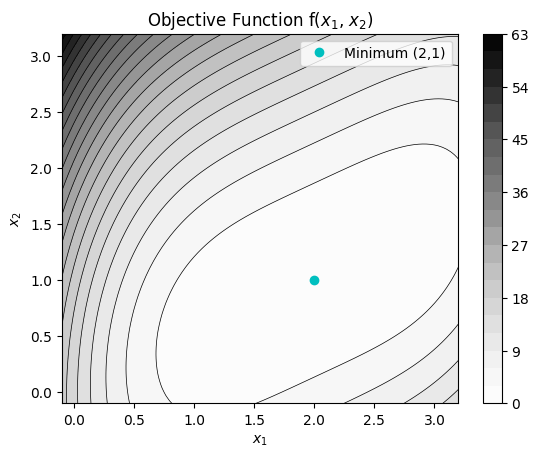

In [3]:
# Grid generation
x = np.linspace(-0.1, 3.2, 100)
y = np.linspace(-0.1, 3.2, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Let's continue with some required Multiple - Variable functions:

In [4]:
def Partial_deriv(f, x, index, delta):
    # Derivative usign forward difference equation
    x_delta = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta[index] += delta
    return (f(x_delta) - f(x)) / delta

def Partial_2nd_Deriv(f, x, index, delta):
    x_delta_a  = x.copy()
    x_delta_b  = x.copy()
    x_delta_ab = x.copy()

    # Increase/Decrease in the required coordinate
    x_delta_a[index[0]]  += delta
    x_delta_b[index[1]]  += delta
    x_delta_ab[index[0]] += delta
    x_delta_ab[index[1]] += delta

    return (f(x_delta_ab) - f(x_delta_b) - f(x_delta_a) + f(x)) / (delta ** 2)

def Gradient(f, x, delta):
    grad = x.copy()
    for i in range(len(x)):
        grad[i] = Partial_deriv(f, x, i, delta)
    return grad

def Hessian(f, x, delta):
    n = len(x)
    Hessian = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            Hessian[i,j] = Partial_2nd_Deriv(f, x, [i,j], delta)
    return Hessian

Additional functions required for Levenberg-Marquard Method Implementation

In [5]:
def B_generation(H_xi, ek0):
    n = H_xi.shape[0]
    ek = ek0
    Continue = True
    while Continue:
        B_Inv = ek*np.eye(n) + H_xi
        try:
            #L = np.linalg.cholesky(B_Inv)
            B = np.linalg.inv(B_Inv)
            Continue = False
        except:
            ek = ek*4
    return B, ek

def Rk_generation(f, x, x_next, grad_x, H_x):
    q_x = f(x)
    q_x_next = q_x + np.dot(grad_x, (x_next - x)) + 1/2 * np.dot((x_next - x), np.dot(H_x, (x_next - x)))
    f_x_next = f(x_next)
    Rk = (f_x_next - q_x)/(q_x_next - q_x)
    return Rk

### *8.7 Newton's Method Modification*

#### *i) Levenberg - Marquardt*

In [6]:
def Leven_Marquardt(f, x_ini, epsilon, delta, ek0):
    # Initial values
    x = np.array(x_ini, dtype=float)
    ek = ek0

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x.copy()]
    
    while True:
        # Increase iterations counter
        k += 1

        # Gradient at current point
        grad_x = Gradient(f, x, delta)

        # Hessian Matrix
        H_x = Hessian(f, x, delta)

        # B matrix
        B, ek = B_generation(H_x, ek)
        
        # Update next "x" value
        x_next = x - np.dot(B, grad_x)

        # Rk Generation
        Rk = Rk_generation(f, x, x_next, grad_x, H_x)
        if(Rk < 0.25):
            ek = 4*ek
        elif(Rk > 0.75):
            ek = ek/2

        # Save each update
        history.append(x_next.copy())

        # Stop criteria
        if(np.linalg.norm(grad_x) < epsilon):
            break

        # Update x value
        x = x_next


    print('\nLeven-Marquardt Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')

    return x_next, history

##### **_Testing_**


Leven-Marquardt Method:
Final Value = [1.96160384 0.98079193] 
Iterations = 15


Text(0, 0.5, '$x_2$')

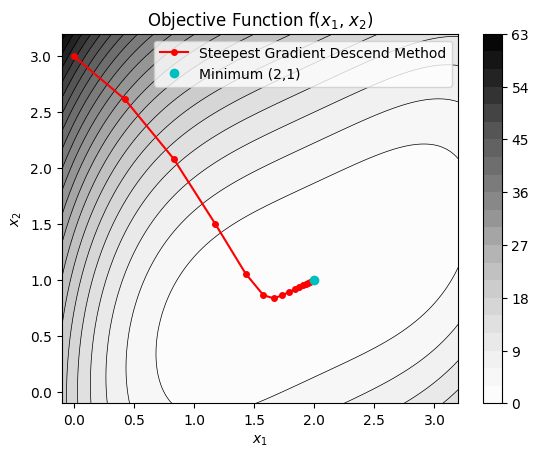

In [8]:
# Parameters for the algorithm
epsilon = 1E-3
ek0 = 50
delta = epsilon/100

# Run Optimization
x, LvMr_History = Leven_Marquardt(f_obj, [0, 3], epsilon, delta, ek0)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

LvMr_History = np.array(LvMr_History)
plt.plot(LvMr_History[:, 0], LvMr_History[:, 1], 'ro-', markersize=4, 
         label="Steepest Gradient Descend Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')